In [13]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/urban-environment-and-public-health/waterborne_disease_dataset.csv


In [10]:
data = pd.read_csv("/kaggle/input/urban-environment-and-public-health/waterborne_disease_dataset.csv")

In [11]:
data.head()

City  Population (%)  AQI  Green Coverage (%)  Factories  \
0   Khulna              52  214                  28         42   
1   Khulna              62  159                  44         43   
2  Cumilla              57  155                  25        134   
3   Sylhet              88  249                  28         35   
4   Sylhet              98  131                  18         67   

   Vehicles Count  Education Institutions Count  Hospitals Count  \
0          528271                           580              117   
1          421236                           472              130   
2         1409614                           201              127   
3          694951                           121              357   
4         1214988                           569              245   

   Waterborne Disease Cases  Respiratory Disease Cases  Year  
0                     11911                      10113  2019  
1                      1265                       3229  2004  
2                      8050                      27320  2006  
3                      3434                      12606  2002  
4                     10608                      21221  2011

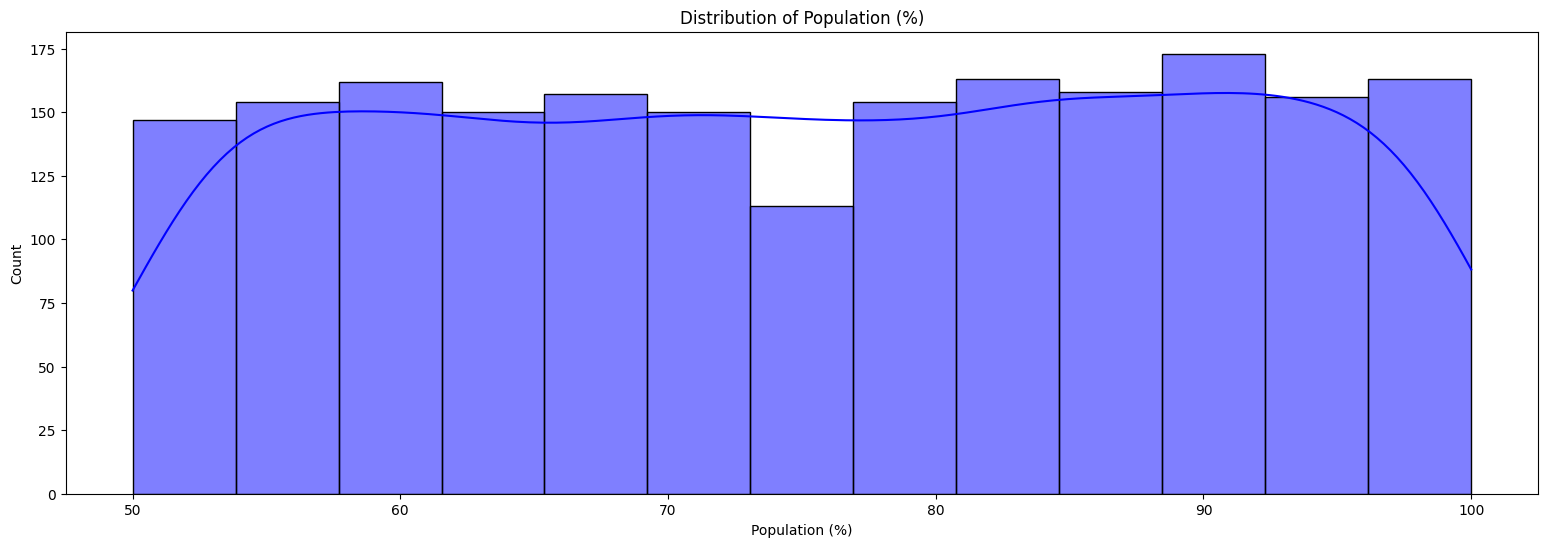

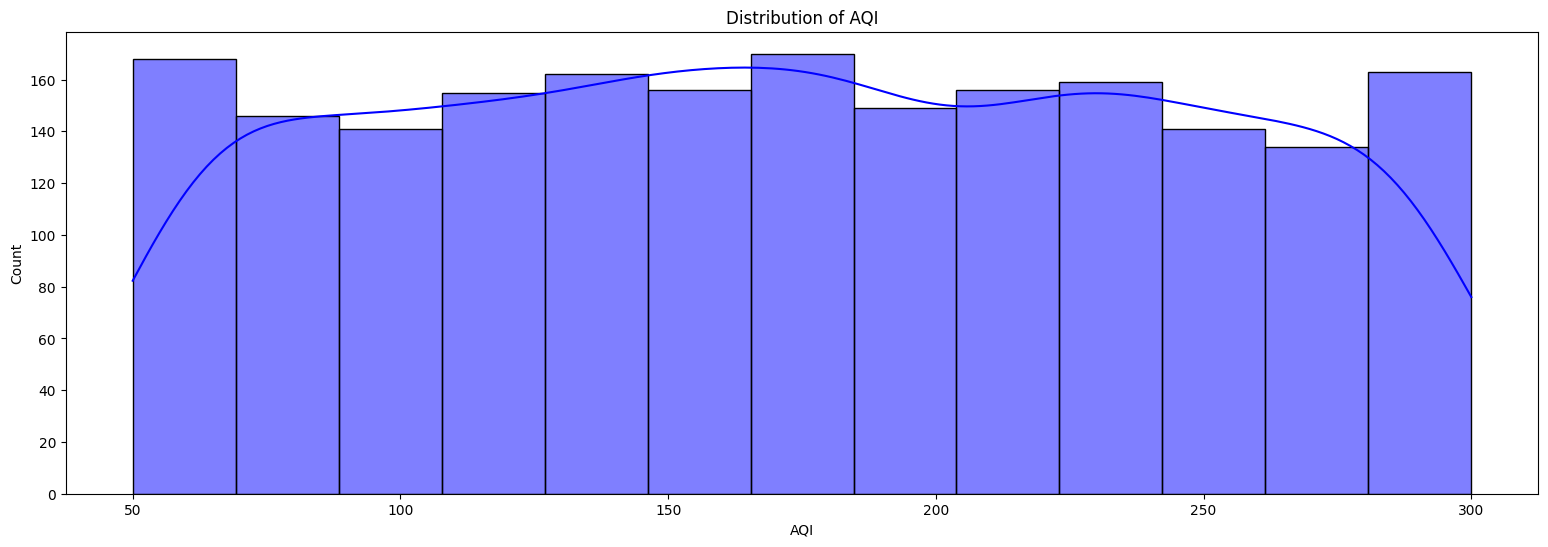

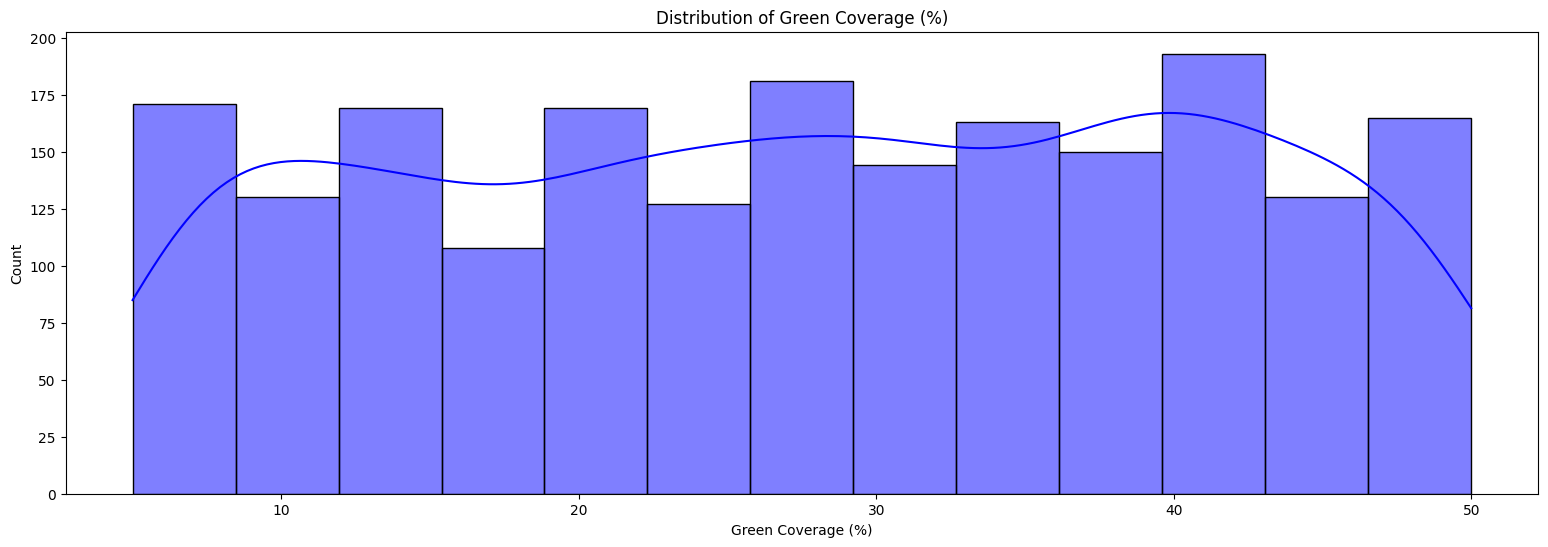

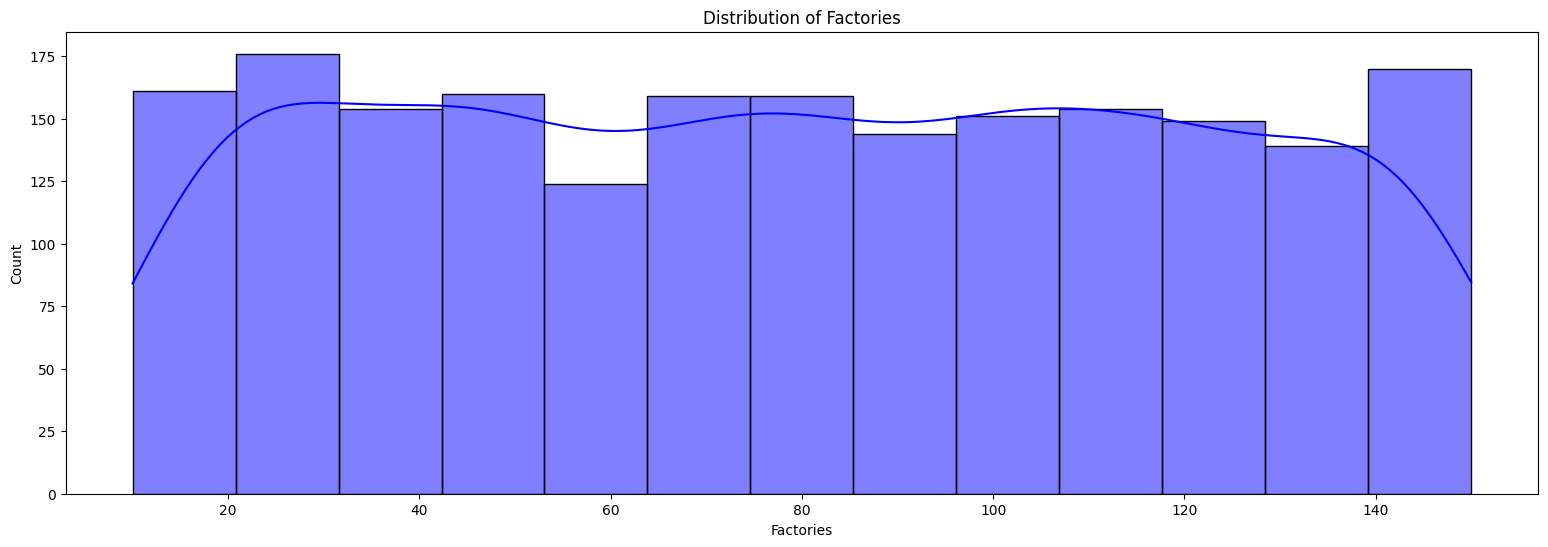

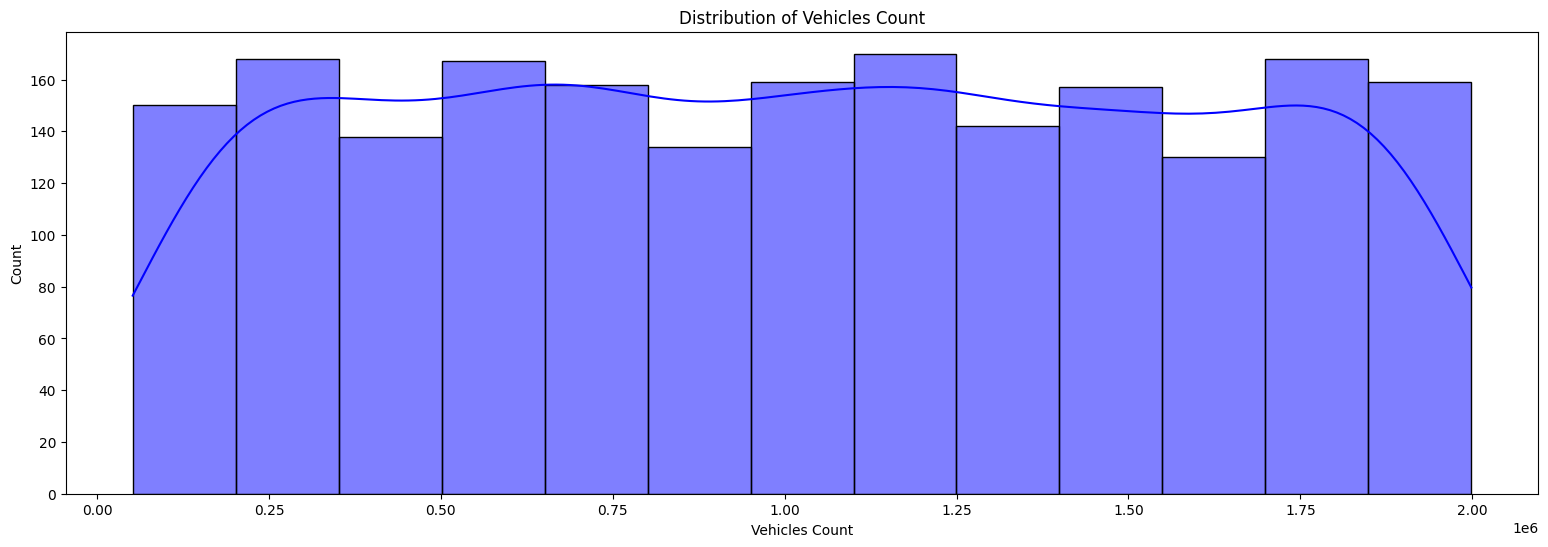

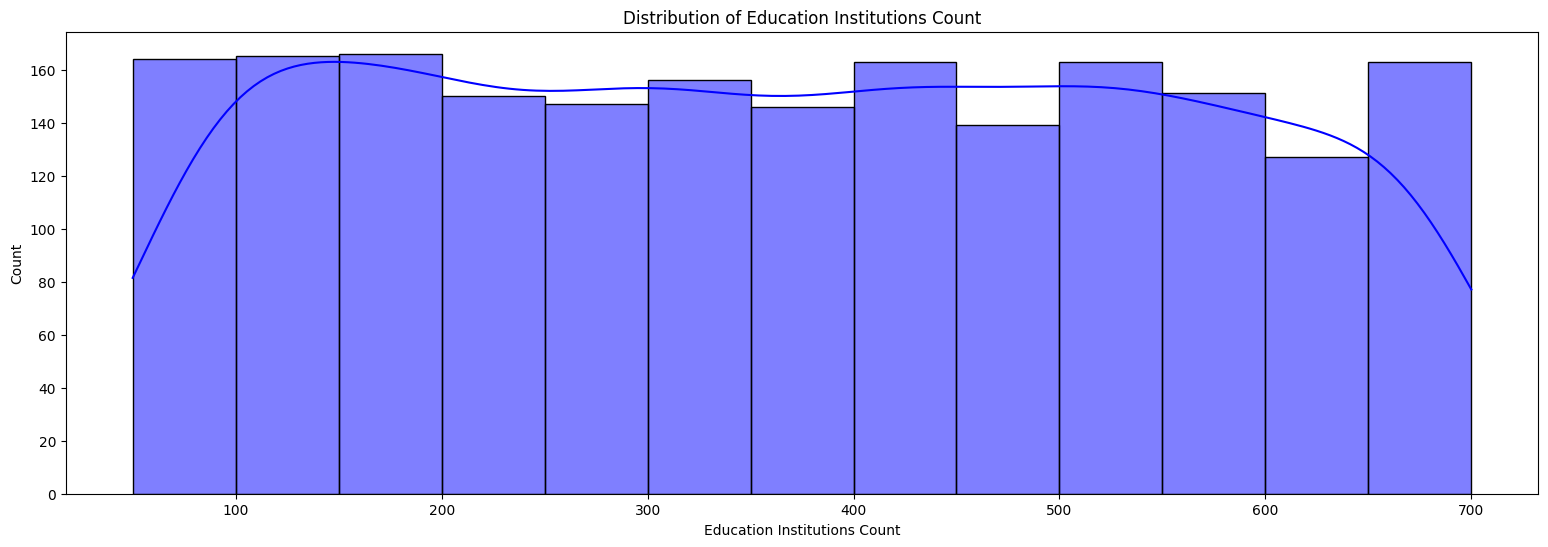

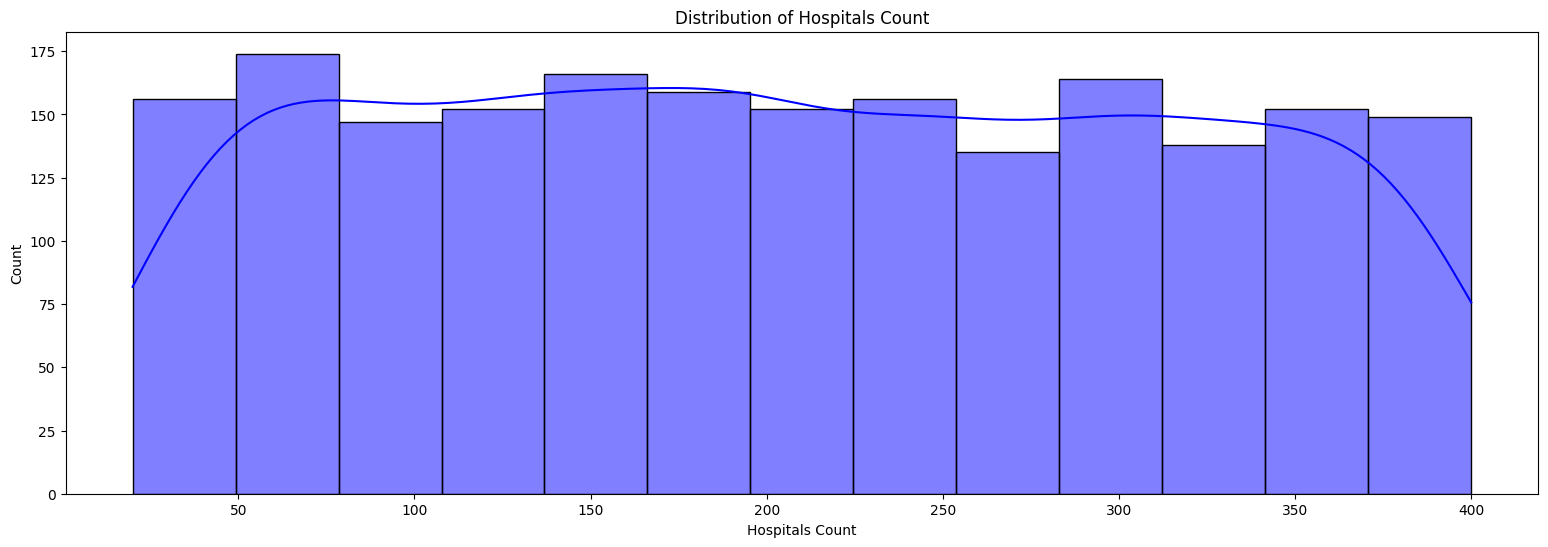

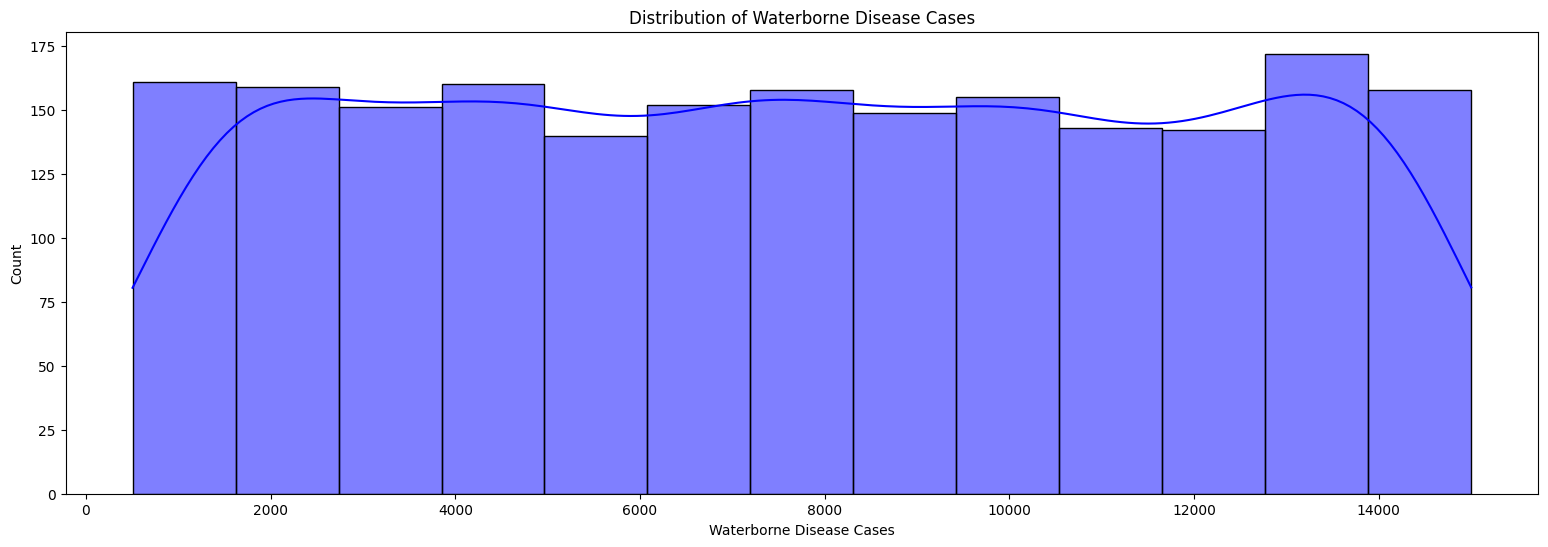

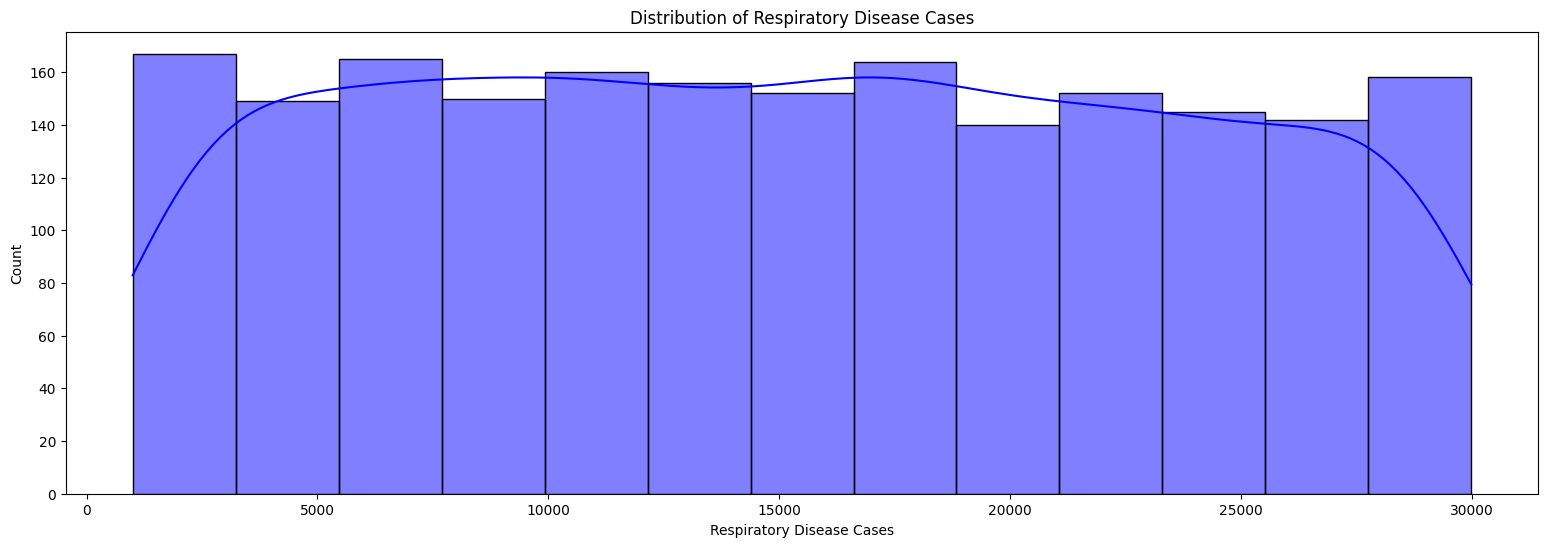

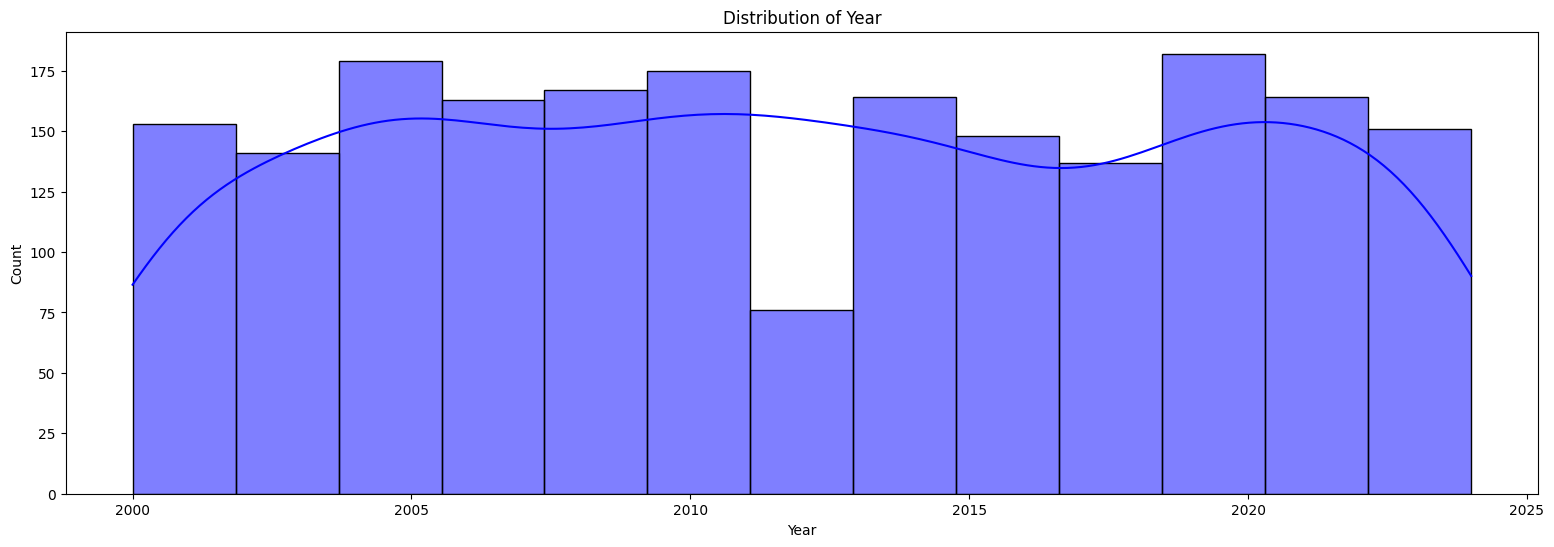

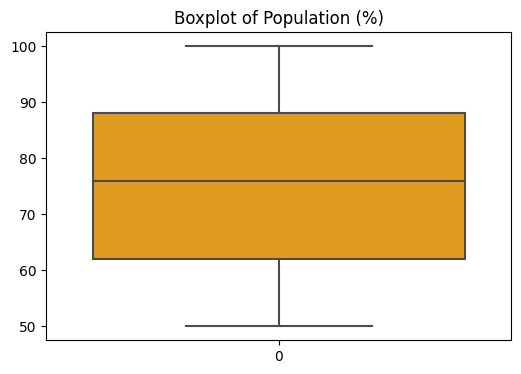

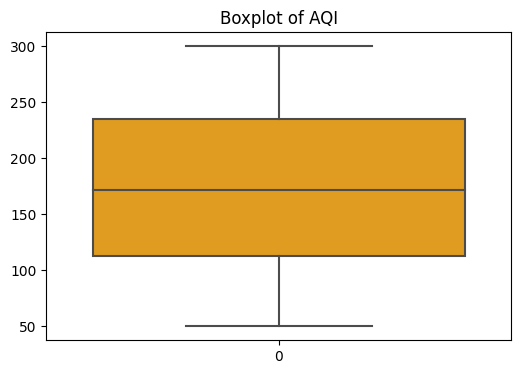

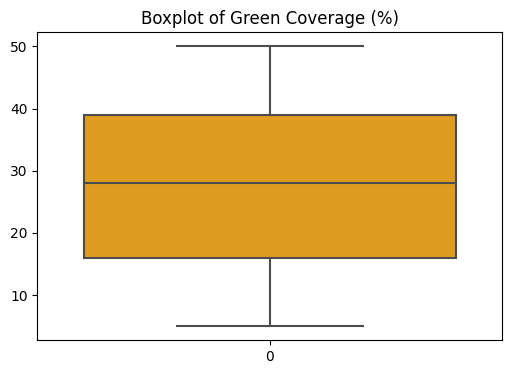

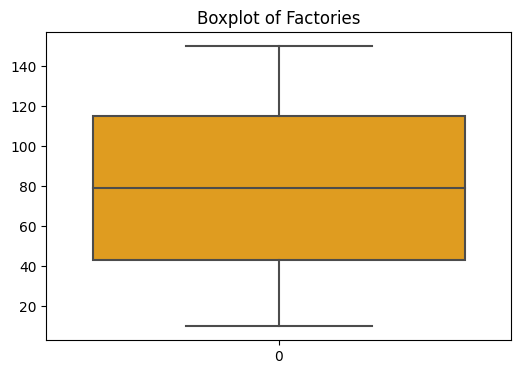

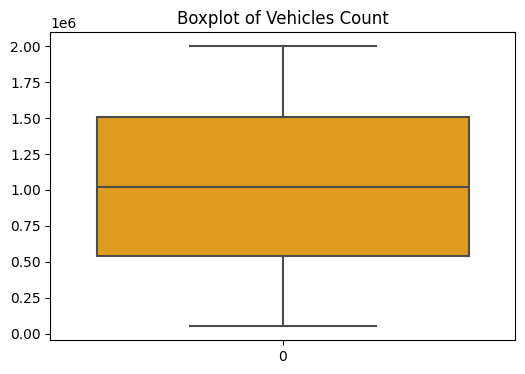

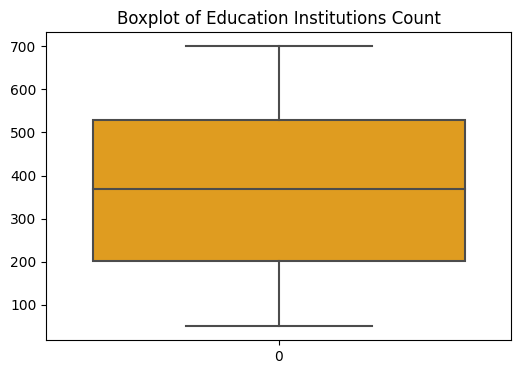

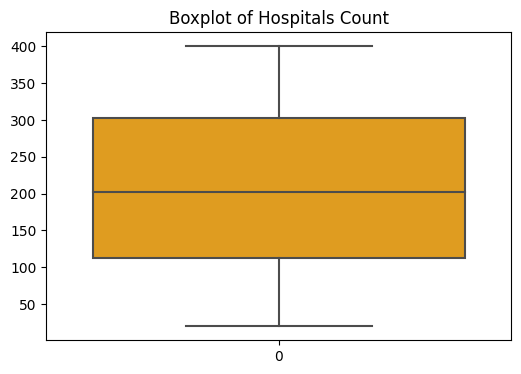

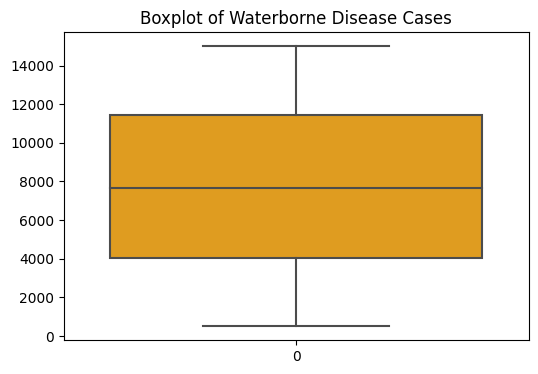

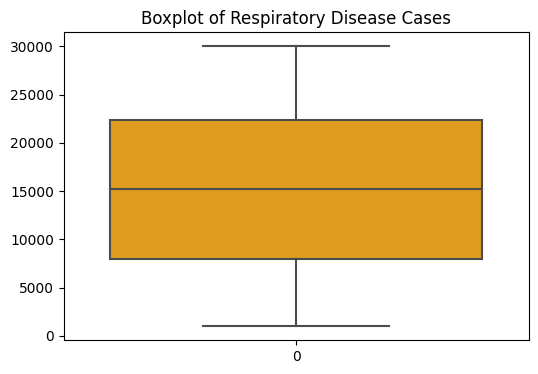

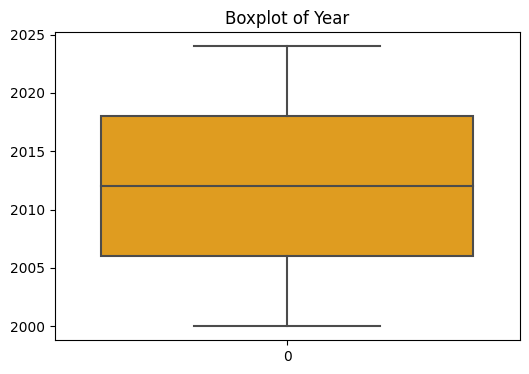

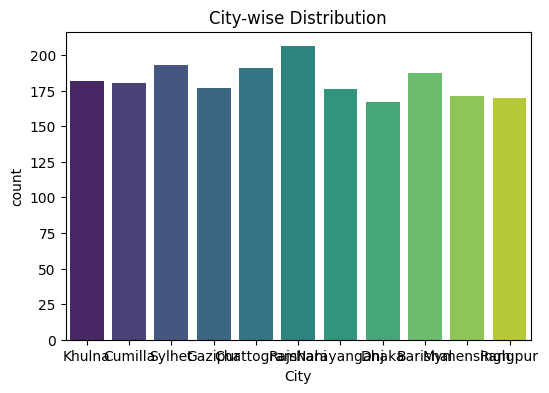

In [15]:
# Histograms
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
for col in numerical_columns:
    plt.figure(figsize=(19, 6))
    sns.histplot(data[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data[col], color="orange")
    plt.title(f"Boxplot of {col}")
    plt.show()

# Countplot for 'City'
plt.figure(figsize=(6, 4))
sns.countplot(x="City", data=data, palette="viridis")
plt.title("City-wise Distribution")
plt.show()

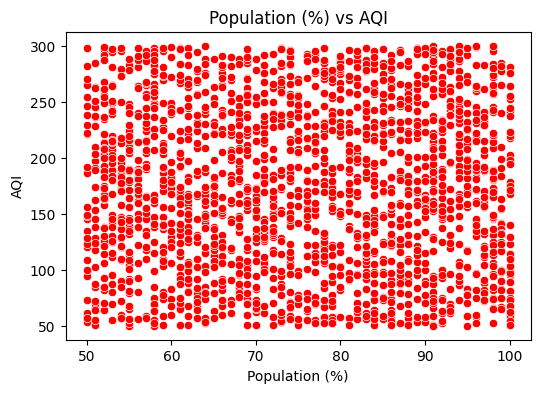

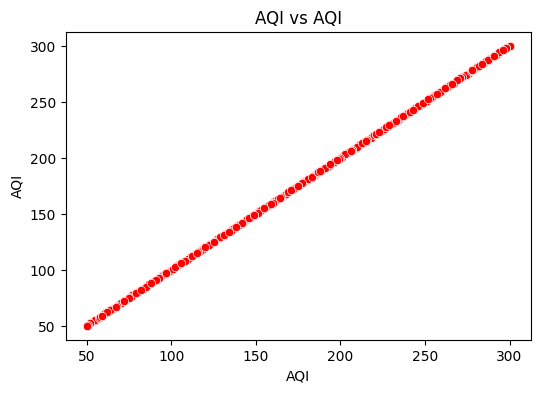

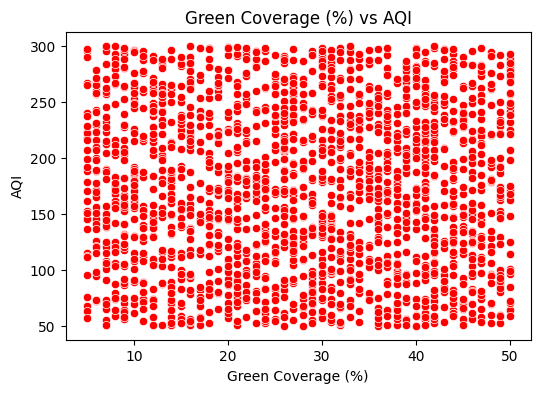

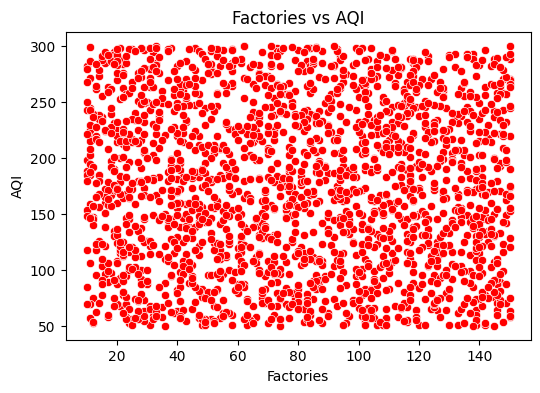

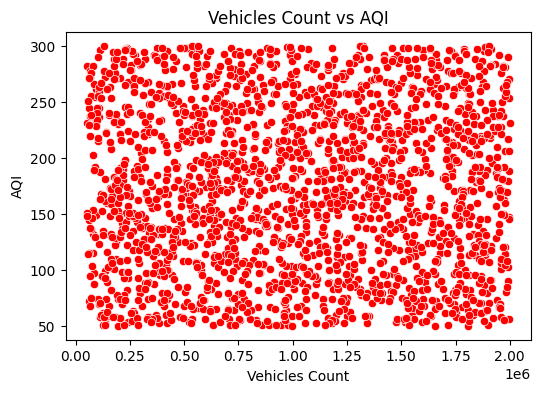

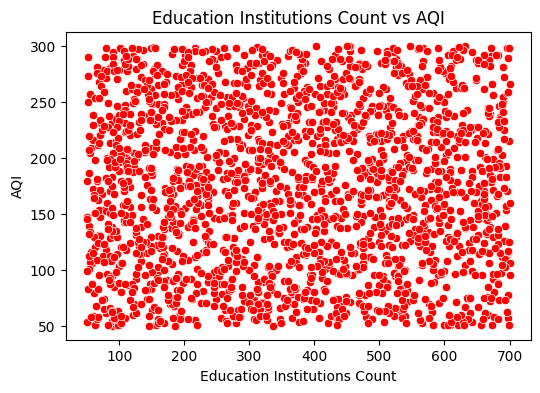

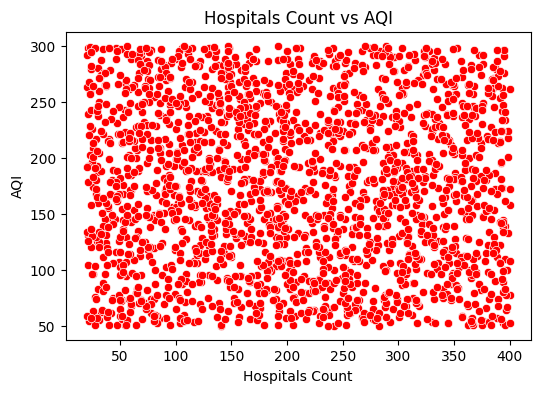

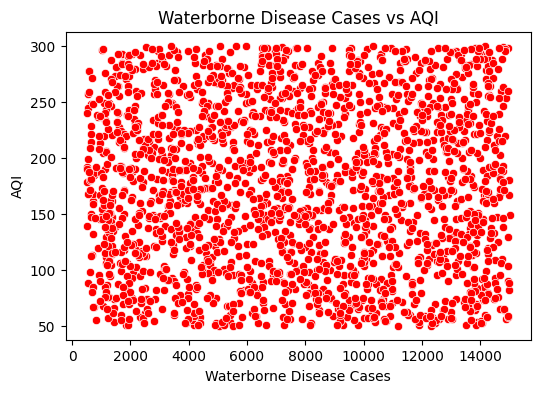

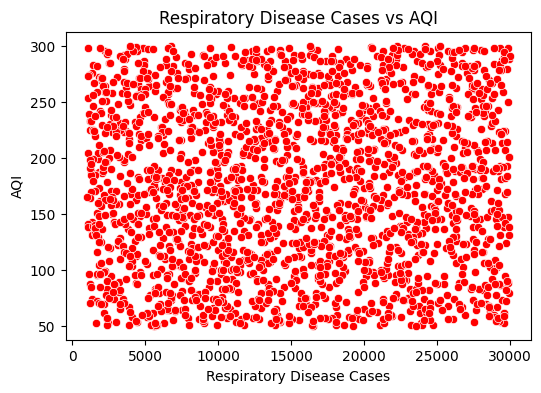

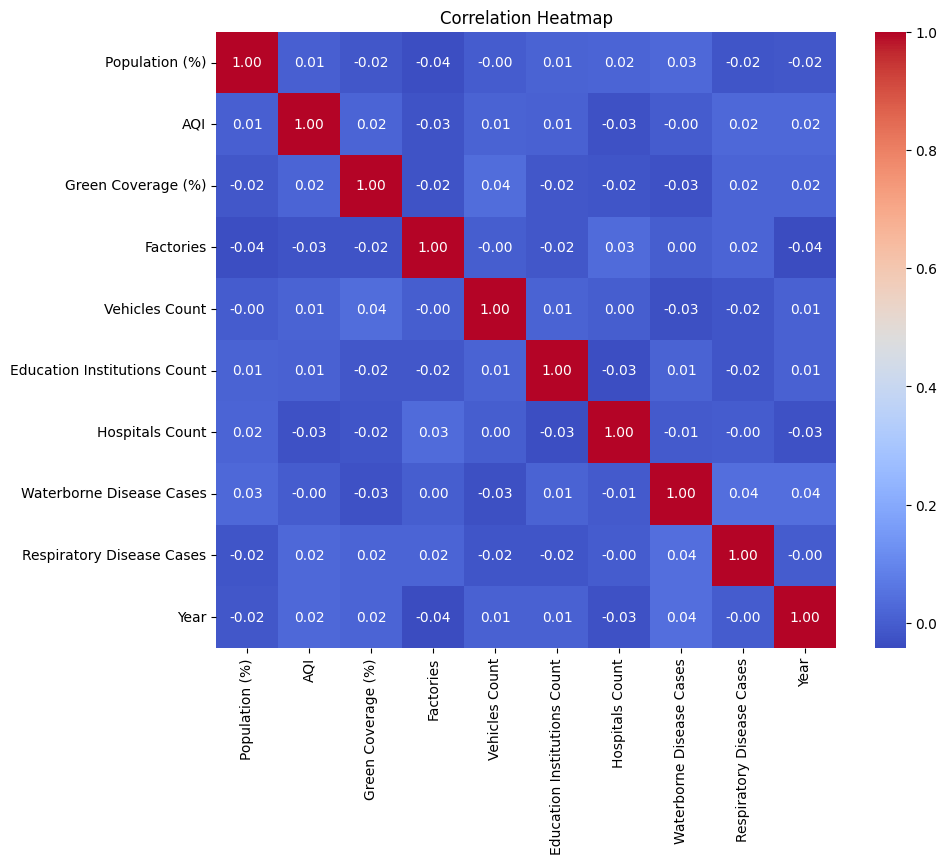

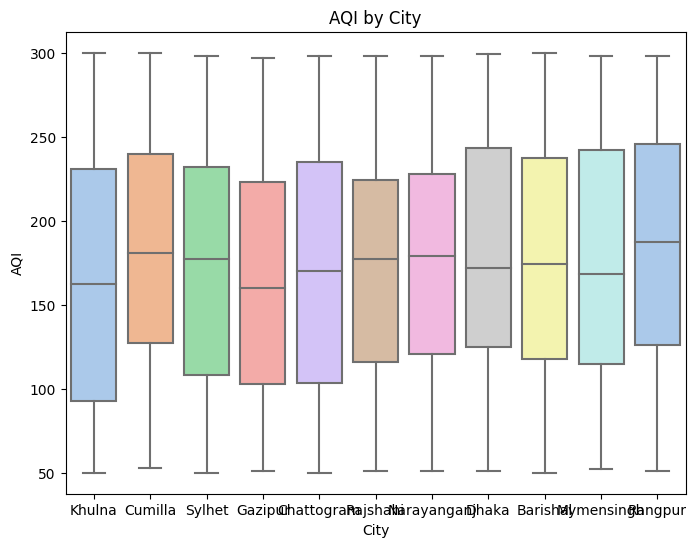

In [16]:
# Scatter plots for numerical columns
for col in numerical_columns:
    if col != "Year":  # Avoid scatter with time
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=col, y="AQI", data=data, color="red")
        plt.title(f"{col} vs AQI")
        plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = data[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x="City", y="AQI", data=data, palette="pastel")
plt.title("AQI by City")
plt.show()


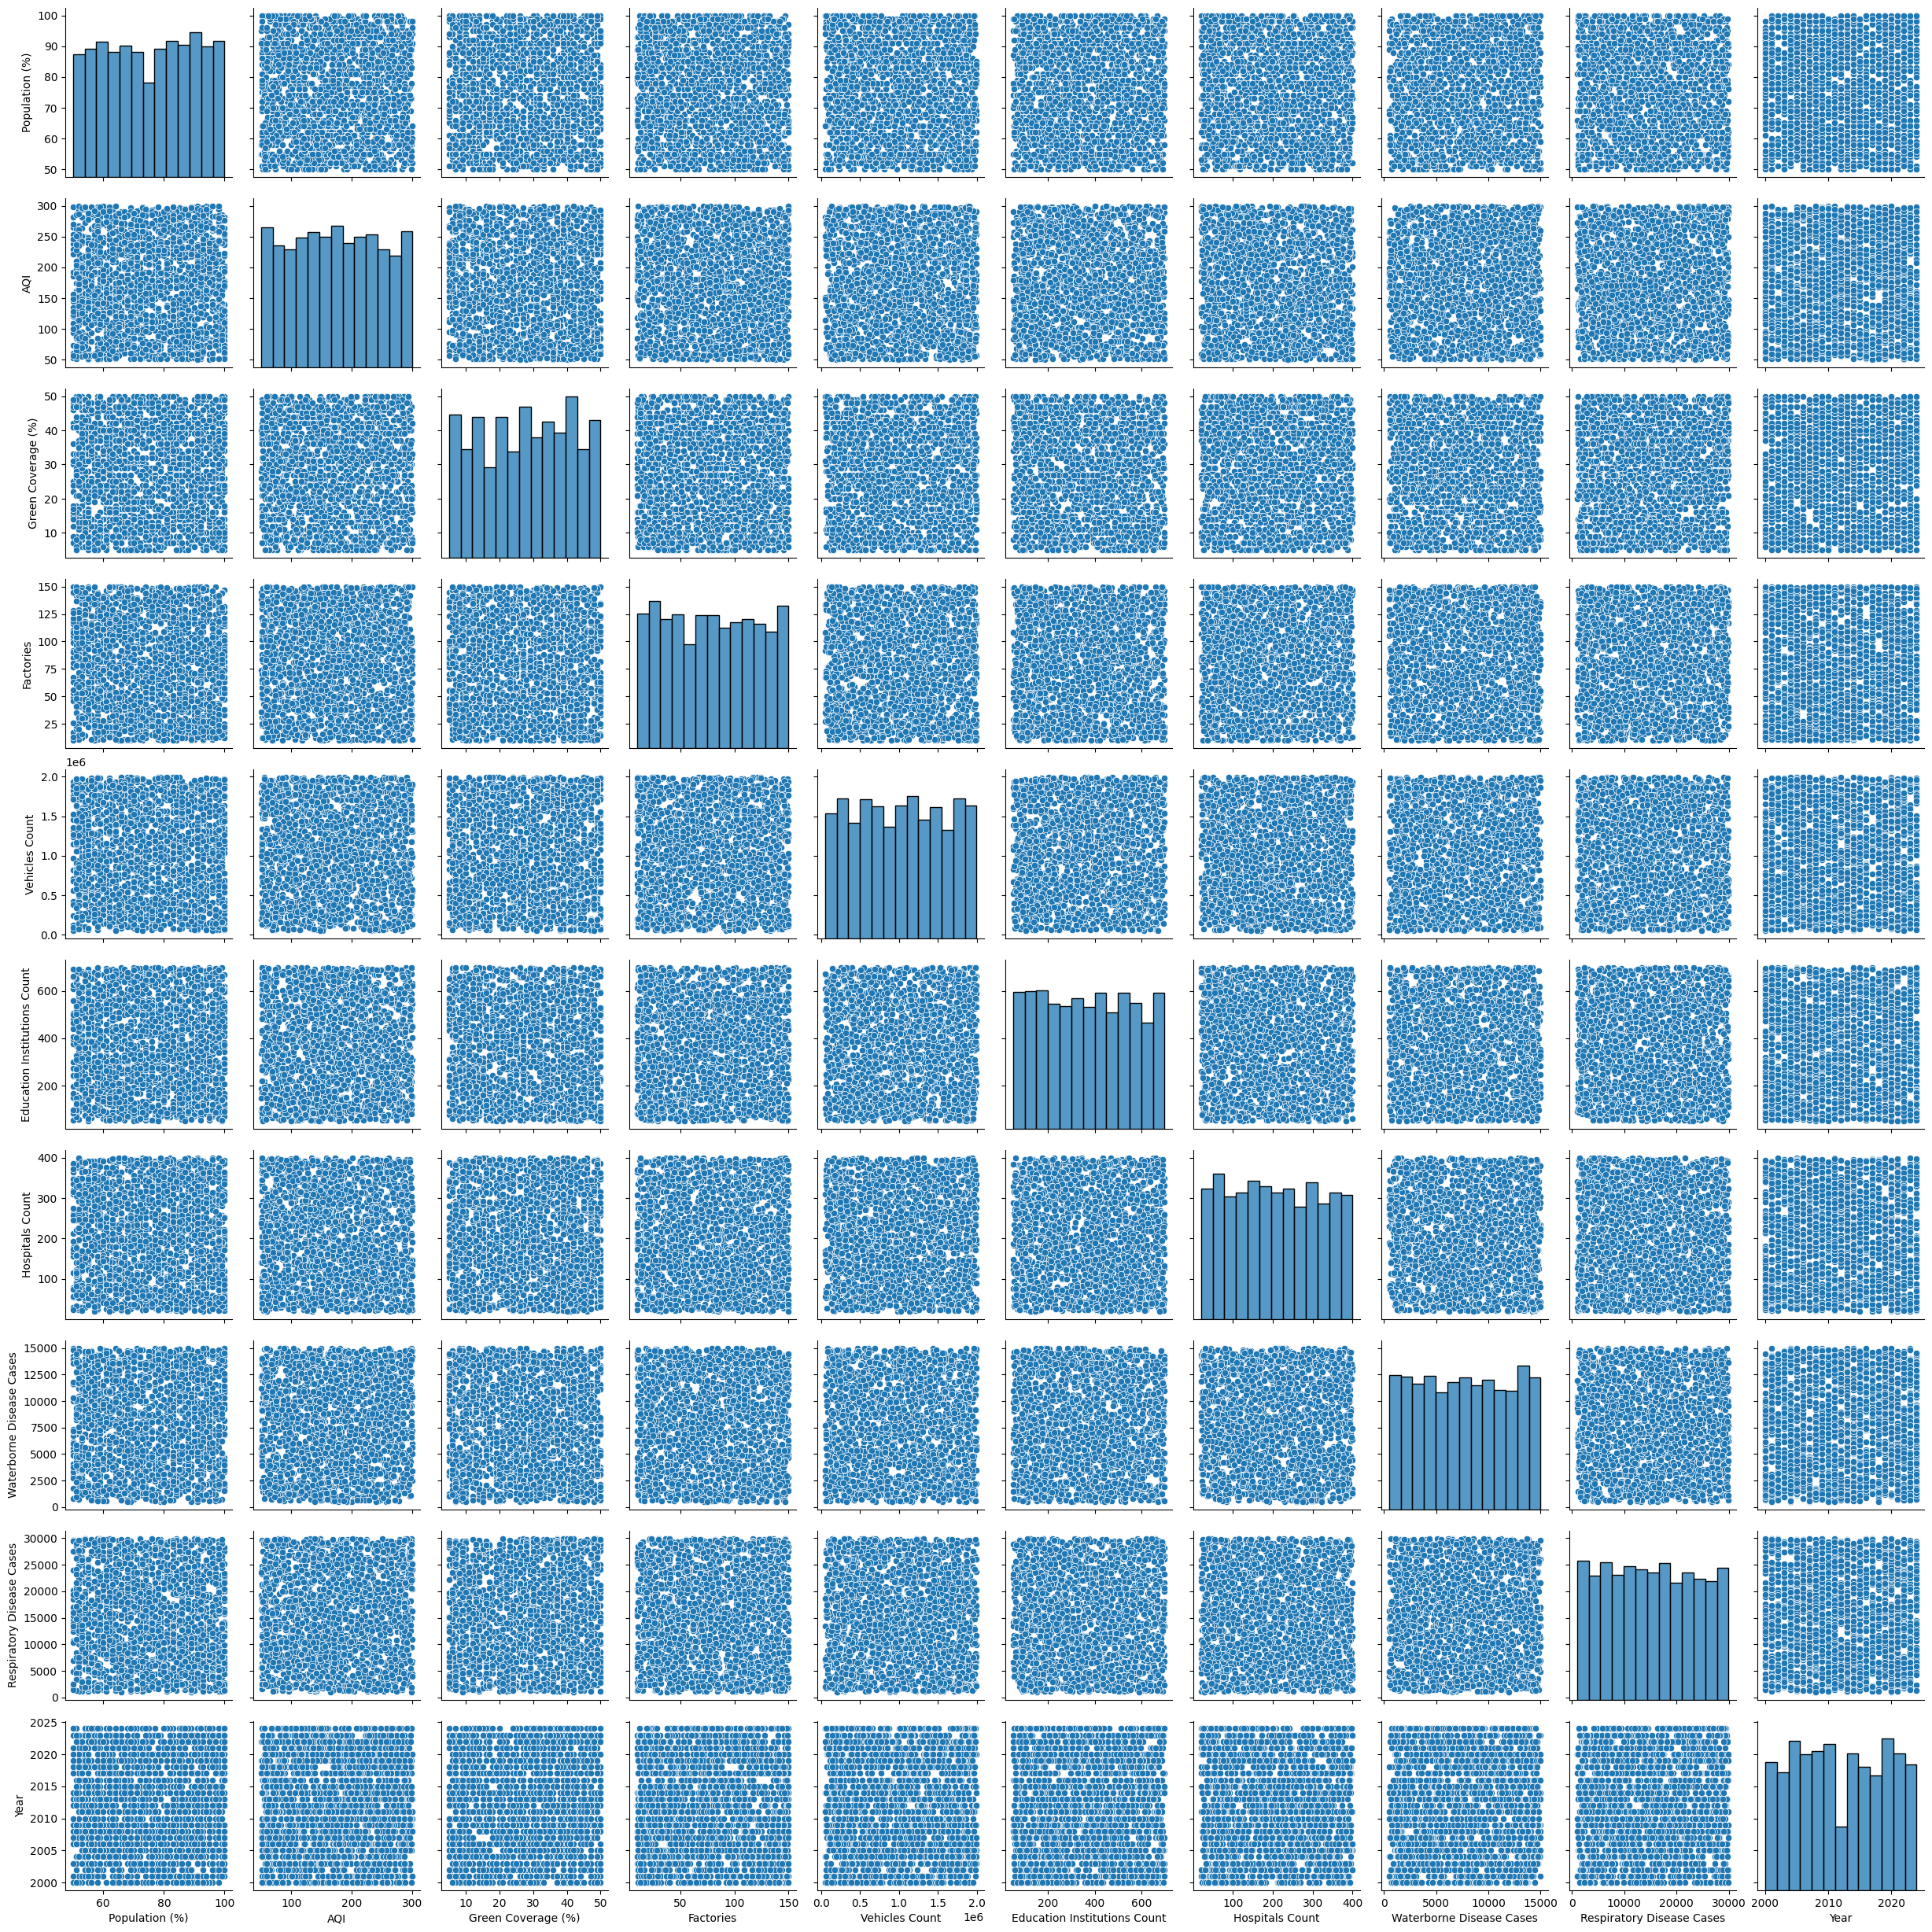

<Figure size 800x600 with 0 Axes>

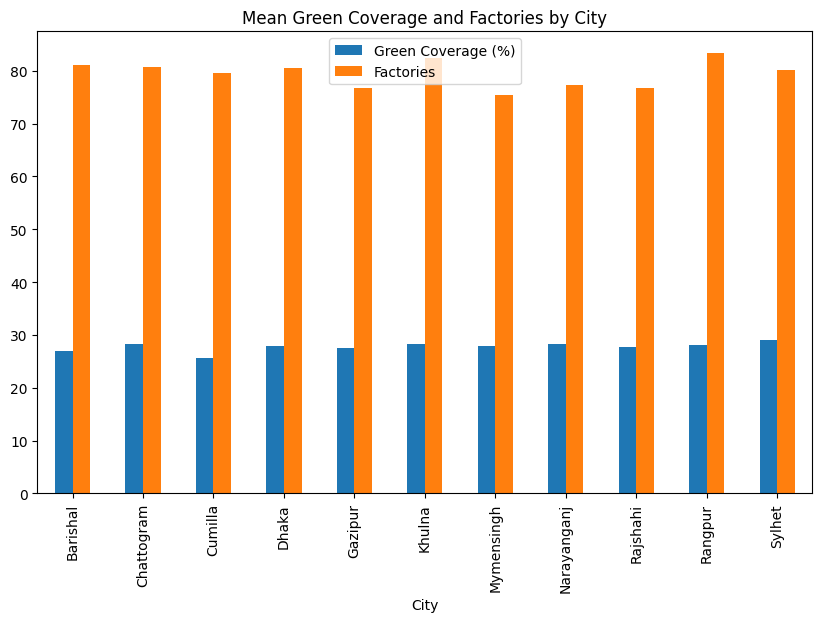

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [19]:
# Pair plot for numerical columns
sns.pairplot(data[numerical_columns])
plt.show()

# Grouped bar plot
plt.figure(figsize=(8, 6))
data.groupby("City")[["Green Coverage (%)", "Factories"]].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Green Coverage and Factories by City")
plt.show()

# Heatmap for cities and AQI
pivot_data = data.pivot("City", "Year", "AQI")
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu")
plt.title("City-wise AQI Over the Years")
plt.show()


In [22]:
data

City  Population (%)  AQI  Green Coverage (%)  Factories  \
0        5              52  214                  28         42   
1        5              62  159                  44         43   
2        2              57  155                  25        134   
3       10              88  249                  28         35   
4       10              98  131                  18         67   
...    ...             ...  ...                 ...        ...   
1995     8              96  215                  16         26   
1996     1              57  155                  21        150   
1997     7              81  206                  17         71   
1998     6              98  243                  30        142   
1999    10              81  296                  14         58   

      Vehicles Count  Education Institutions Count  Hospitals Count  \
0             528271                           580              117   
1             421236                           472              130   
2            1409614                           201              127   
3             694951                           121              357   
4            1214988                           569              245   
...              ...                           ...              ...   
1995         1038744                           491              313   
1996         1767732                           589              382   
1997         1996195                           408               29   
1998         1325183                           165              375   
1999          227492                           527              389   

      Waterborne Disease Cases  Respiratory Disease Cases  Year  
0                        11911                      10113  2019  
1                         1265                       3229  2004  
2                         8050                      27320  2006  
3                         3434                      12606  2002  
4                        10608                      21221  2011  
...                        ...                        ...   ...  
1995                     14743                      12116  2004  
1996                      9638                       9615  2010  
1997                     13099                       2213  2012  
1998                      2115                       2680  2011  
1999                     13424                      26553  2010  

[2000 rows x 11 columns]

Hybrid Model Evaluation:
MSE: 5934.15
MAE: 67.22
R2 Score: -0.04


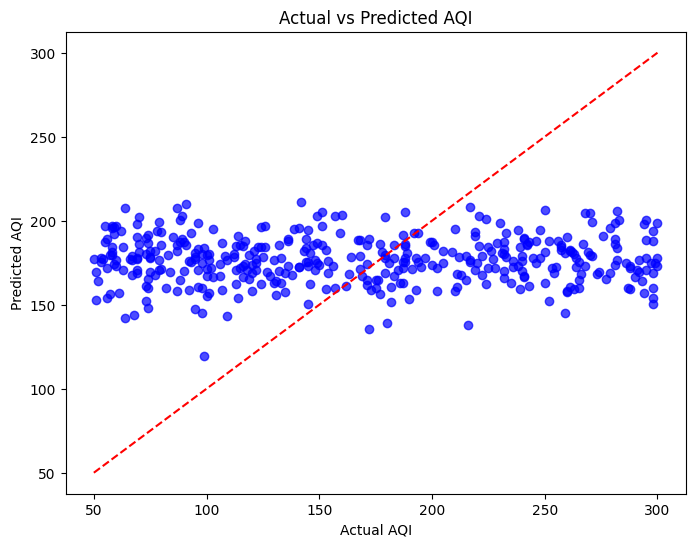

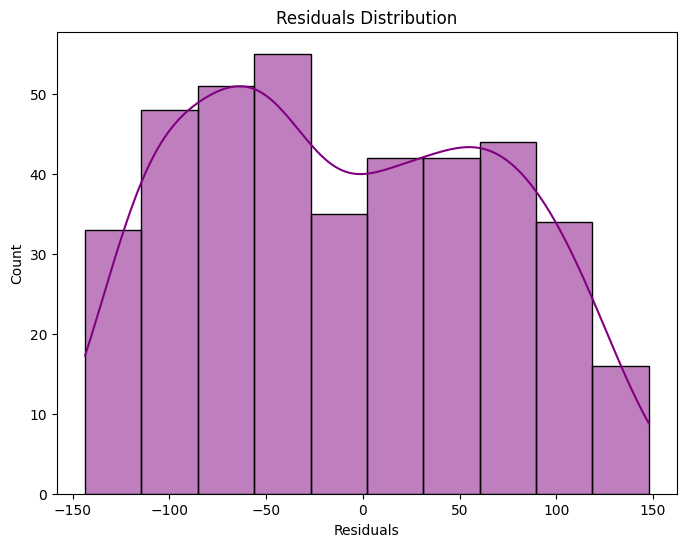

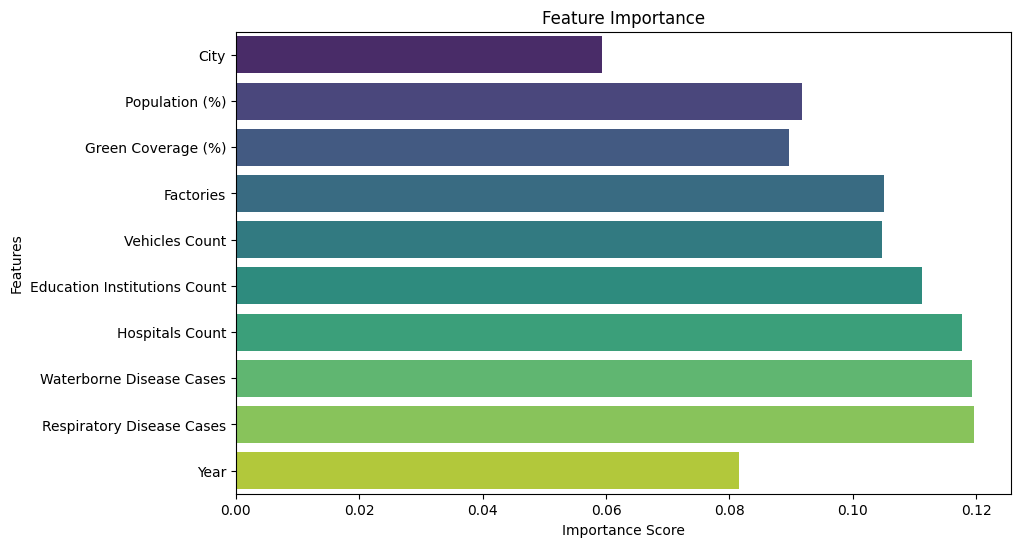

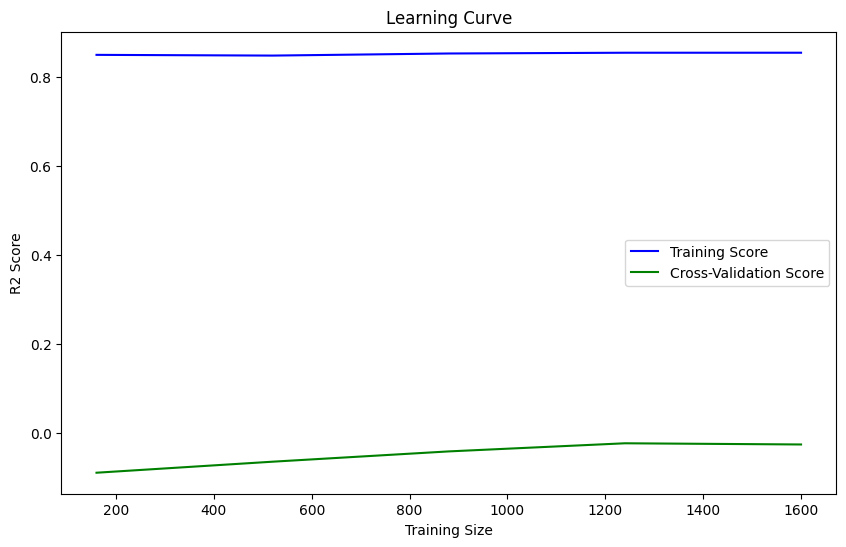

In [23]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline



# Preprocessing
X = data.drop(columns=["AQI"])  # Features
y = data["AQI"]  # Target variable

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hybrid model: Combining RandomForest and GradientBoosting
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train individual models
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# Predictions from individual models
rf_pred = rf.predict(X_test)
gbr_pred = gbr.predict(X_test)

# Hybrid prediction using weighted average
hybrid_pred = 0.6 * rf_pred + 0.4 * gbr_pred

# Evaluation Metrics
mse = mean_squared_error(y_test, hybrid_pred)
mae = mean_absolute_error(y_test, hybrid_pred)
r2 = r2_score(y_test, hybrid_pred)

print(f"Hybrid Model Evaluation:\nMSE: {mse:.2f}\nMAE: {mae:.2f}\nR2 Score: {r2:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, hybrid_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

# Residual Plot
residuals = y_test - hybrid_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# Feature Importance from RandomForest
feature_importance = rf.feature_importances_
features = data.drop(columns=["AQI"]).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="green")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("R2 Score")
plt.legend()
plt.show()
